# Assignment 2

Read all instructions carefully

## Work Requirements

- You must work on Assignment 2 alone. You may not work with partners.
- You may use online resources (Stack Exchange, Googling, Regex cheat sheets), including documentation and everything on Canvas. However, you may not use an LLM (ChatGPT, Copilot, etc)
- Lightly document your code, especially any decisions you make along the way. You do not need extensive documentation. You do **NOT** need a separate README file. But a person should be able to read your submission top to bottom and understand what you're doing.

## Submission Instructions

- This assignment is due on **Monday, October 6 at 6:59pm**.
- The assignment must be submitted on Canvas as a single PDF file together with a requirements.txt file (as a text file, not PDF). The two files must be submitted as separate files, not as a zip file.
- The PDF file you submit must be named with the following format "lastname_firstname_assignment2.pdf"
- The requirements.txt file should only include the libraries you need to run your code in a Jupyter notebook, with their versions properly specified (e.g., use pip freeze with your venv activated)

## Recommendations and Resources

**Recommendation:** Complete the assignment in a Jupyter notebook, and then convert the notebook to a PDF. If you have too much trouble converting to PDF, then convert it to HTML, open it as HTML and export that page to PDF (but this is a less preferred option).

**Recommendation:** As always, start by examining the data you read in and understand it. What does each row represent in each dataframe?

**Helpful Documentation:**
- Pandas expanding: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.expanding.html#pandas.DataFrame.expanding
- Python re library for Regex: https://docs.python.org/3/library/re.html
- Pareto: https://numpy.org/doc/stable/reference/random/generated/numpy.random.pareto.html#numpy.random.pareto
- Gaussian: https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html#numpy-random-normal
- Seaborn Boxplot: https://seaborn.pydata.org/generated/seaborn.boxplot.html
- Seaborn Scatterplot: https://seaborn.pydata.org/generated/seaborn.scatterplot.html
- Matplotlib scatterplot: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
- Matplotlib boxplot: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html#

# Part 0 - Imports and CoW

In [441]:
from pathlib import Path
import pandas as pd  # need to import pandas first.

# Enforce Copy-on-Write
pd.set_option("mode.copy_on_write", True)

In [442]:
# Import libraries
import numpy as np
# import pandas as pd  -- imported above to run pd.set_option
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [443]:
# set standard paths
cwd = Path().cwd() #set our cwd
project_folder = cwd.parent #set our project folder as the cwd parent

# Part 1 - Regex, EDA, and Visualization

Load the Food Safety datasets (bus.csv, ins2vio.csv, ins.csv, and vio.csv) into pandas dataframes and answer the following questions based on the dataframes.

In [ ]:
#Load the datasets into Pandas DataFrames

# contruct the path to and retrieve the file that holds the info regarding the buinesses
bus_dataset_path = Path('data/bus.csv') # using a data folder makes life easier
bus_file = project_folder / bus_dataset_path # join the project folder with the dataset path
if not bus_file.exists():  # error catching in case the file is not found
	raise FileNotFoundError(f"Dataset file not found: {bus_file}")

# contruct the path to and retrieve the file that holds the info regarding the inspections
ins_dataset_path = Path('data/ins.csv') #using a data folder makes life easier
ins_file = project_folder / ins_dataset_path #join the project folder with the dataset path
if not ins_file.exists():
	raise FileNotFoundError(f"Dataset file not found: {ins_file}")

# contruct the path to and retrieve the file that holds the relation from inspection to violation
ins2vio_dataset_path = Path('data/ins2vio.csv') #using a data folder makes life easier
ins2vio_file = project_folder / ins2vio_dataset_path #join the project folder with the dataset path
if not ins2vio_file.exists(): # error catching in case the file is not found
	raise FileNotFoundError(f"Dataset file not found: {ins2vio_file}")

# contruct the path to and retrieve the file that holds the info regarding the violations
vio_dataset_path = Path('data/vio.csv') #using a data folder makes life easier
vio_file = project_folder / vio_dataset_path #join the project folder with the dataset path
if not vio_file.exists(): # error catching in case the file is not found
	raise FileNotFoundError(f"Dataset file not found: {vio_file}")

# store each file in a dataframe
df_bus = pd.read_csv(bus_file)
df_ins = pd.read_csv(ins_file)
df_i2v = pd.read_csv(ins2vio_file)
df_vio = pd.read_csv(vio_file)

Use the business dataset (bus) to answer the first few questions below

1.1) Examining the entries in `bus`, is the `bid` unique for each record (i.e. each row of data)?

Hint: use `value_counts()` or `unique()` to determine if the `bid` series has any duplicates.

In [ ]:
# compare the number of unique elements in the column with the number of elements in column to find out if the bid column is unique
is_unique = df_bus['business id column'].unique().size == df_bus['business id column'].size
print('The entries in the bid column of the bus file are unique: ', is_unique)

The entries in the bid column of the bus file are unique:  True


Exploring the data

In [446]:
# take a peek at the dataframe
df_bus.head()

,business id column,name,address,city,state,postal_code,latitude,longitude,phone_number
0,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110,37.755282,-122.420493,-9999
1,100010,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B,San Francisco,CA,94133,-9999.000000,-9999.000000,14154827284
2,100017,AMICI'S EAST COAST PIZZERIA,475 06th St,San Francisco,CA,94103,-9999.000000,-9999.000000,14155279839
3,100026,LOCAL CATERING,1566 CARROLL AVE,San Francisco,CA,94124,-9999.000000,-9999.000000,14155860315
4,100030,OUI OUI! MACARON,2200 JERROLD AVE STE C,San Francisco,CA,94124,-9999.000000,-9999.000000,14159702675


In [447]:
# take a look at the columns of the business dataframe
df_bus.columns

Index(['business id column', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'phone_number'],
      dtype='object')

In [ ]:
# take a look at some stats of the numeric columns of the business dataframe
df_bus.describe()

,business id column,latitude,longitude,phone_number
count,6253.000000,6253.000000,6253.000000,6.253000e+03
mean,60448.948984,-5575.337966,-5645.817699,4.701819e+09
std,36480.132445,4983.390142,4903.993683,6.667508e+09
min,19.000000,-9999.000000,-9999.000000,-9.999000e+03
25%,18399.000000,-9999.000000,-9999.000000,-9.999000e+03
50%,75685.000000,-9999.000000,-9999.000000,-9.999000e+03
75%,90886.000000,37.776494,-122.421553,1.415533e+10
max,102705.000000,37.824494,0.000000,1.415988e+10


In [ ]:
# describe() showed that not all columns are numeric. Explore the datatypes of all columns
df_bus.dtypes

business id column      int64
name                   object
address                object
city                   object
state                  object
postal_code            object
latitude              float64
longitude             float64
phone_number            int64
dtype: object

1.2) In the two cells below create the following **two numpy arrays**:

1. Assign `top_names` to the top 5 most frequently used business names, from most frequent to least frequent.
2. Assign `top_addresses` to the top 5 addressses where businesses are located, from most popular to least popular.

Hint: you may find `value_counts()` helpful. 

In [450]:
# store the names with the 5 highest value counts as a numpy array top_names (value_counts returns a Series, names are the index)
top_names = np.array(df_bus['name'].value_counts().head().index) 
# store the addresses with the 5 highest value counts as a numpy array top_names (value_counts returns a Series, addresses are the index)
top_addresses = np.array(df_bus['address'].value_counts().head().index)


1.3) Look at the businesses that DO NOT have the special MISSING ZIP code value. Some of the invalid postal codes are just the full 9 digit code rather than the first 5 digits. Create a new column named `postal5` in the original bus dataframe which contains only the first 5 digits of the postal_code column. Finally, for any of the likely MISSING postal5 ZIP code entries set the entry to None.

In [451]:
# manually explore postal_code column because it is not numeric
df_bus['postal_code'].value_counts()

postal_code
94103         562
94110         555
94102         456
94107         408
94133         398
             ... 
94124-1917      1
94102-5917      1
94105-2907      1
95112           1
94123-3106      1
Name: count, Length: 63, dtype: int64

In [452]:
df_bus['postal_code'].min()

'-9999'

In [ ]:
# take a look at the unique postal codes to see the unique values and identify the erroneous values
df_bus['postal_code'].unique()

array(['94110', '94133', '94103', '94124', '94123', '94118', '94121',
       '94134', '94114', '94109', '94102', '94132', '94116', '-9999',
       '94107', '94105', '94108', '94117', '94158', '94112', '94127',
       '94105-1420', '94111', '94122', '94115', '94104', '94122-1909',
       '94131', '94117-3504', '94518', '95105', '94013', '94130',
       '941102019', '941', '941033148', 'CA', '92672', '94120', '94143',
       '94101', '94014', '94129', '94602', 'Ca', '94080', '00000',
       '94188', '64110', '94544', '94301', '94901', '95117', '95133',
       '95109', '95132', '95122', '94621', '94124-1917', '94102-5917',
       '94105-2907', '95112', '94123-3106'], dtype=object)

From the textbook we know the special missing zip value is -9999. 
It also appears there is at least one value that is short digits, and a couple that appear to hold the state abbreviation instead.

back to the problem- 
"Look at the businesses that DO NOT have the special MISSING ZIP code value. Some of the invalid 
postal codes are just the full 9 digit code rather than the first 5 digits. Create a new column 
named `postal5` in the original bus dataframe which contains only the first 5 digits of the # postal_code column. 
Finally, for any of the likely MISSING postal5 ZIP code entries set the entry to None. "

In [472]:
#Create a new column  named `postal5` in the original bus dataframe which contains only the first 5 digits of the 
# postal_code column. 
df_bus['postal5'] = df_bus['postal_code'].str[:5]

# check to see if anything weird happened when we stored just the first 5 digits of postal_code in postal5
df_bus['postal5'].unique()



array(['94110', '94133', '94103', '94124', '94123', '94118', '94121',
       '94134', '94114', '94109', '94102', '94132', '94116', '-9999',
       '94107', '94105', '94108', '94117', '94158', '94112', '94127',
       '94111', '94122', '94115', '94104', '94131', '94518', '95105',
       '94013', '94130', '941', 'CA', '92672', '94120', '94143', '94101',
       '94014', '94129', '94602', 'Ca', '94080', '00000', '94188',
       '64110', '94544', '94301', '94901', '95117', '95133', '95109',
       '95132', '95122', '94621', '95112'], dtype=object)

In [474]:
# #Finally, for any of the likely MISSING postal5 ZIP code entries set the entry to None.
# replace the zip codes that contain the missing zip code value with 'None'
df_bus['postal5'] = df_bus['postal5'].str.replace('-9999', 'None', regex = True)

df_bus['postal5'].unique()

array(['94110', '94133', '94103', '94124', '94123', '94118', '94121',
       '94134', '94114', '94109', '94102', '94132', '94116', 'None',
       '94107', '94105', '94108', '94117', '94158', '94112', '94127',
       '94111', '94122', '94115', '94104', '94131', '94518', '95105',
       '94013', '94130', '941', 'CA', '92672', '94120', '94143', '94101',
       '94014', '94129', '94602', 'Ca', '94080', '00000', '94188',
       '64110', '94544', '94301', '94901', '95117', '95133', '95109',
       '95132', '95122', '94621', '95112'], dtype=object)

In [ ]:
# investigate the other odd values returned that are not 5 digits: 'CA', 'Ca', '00000', '941' 
pattern = r'^[0-9]{5}'
df_bus[~df_bus['postal5'].str.match(pattern)] 
df_bus[(df_bus['postal5'] != 'None') & (~df_bus['postal5'].str.match(pattern))] 


,business id column,name,address,city,state,postal_code,latitude,longitude,phone_number,postal5
1824,5208,GOLDEN GATE YACHT CLUB,1 YACHT Rd,San Francisco,CA,941,37.807878,-122.442499,14155342628,941
2409,64540,Leo's Hot Dogs,2301 Mission St,San Francisco,CA,CA,37.760054,-122.419166,14155774013,CA
2418,64738,Japacurry,Public,San Francisco,CA,CA,37.777122,-122.419639,-9999,CA
4576,88139,Tacolicious,2250 Chestnut St,San Francisco,CA,Ca,-9999.000000,-9999.000000,14155646077,Ca


*I am not familiar enough with San Francisco or the zip code lat/ long areas to be able to speculate the correct zip codes here.  May be solved with a quick google for each restaurant and address, or go back to the source, but for now it would not be accurate to replace these postal codes with "None" because they were not missing.*

Now using the four Food Safety datasets bus.csv, ins2vio.csv, ins.csv, and vio.csv:

1.5) Create a side-by-side boxplot that shows the distribution of the restaurant scores for each different risk category from 2017 to 2019. Use a figure size of at least 12 by 8.

Hint: Consider using appropriate JOIN operations.

<Axes: xlabel='risk_category', ylabel='score'>

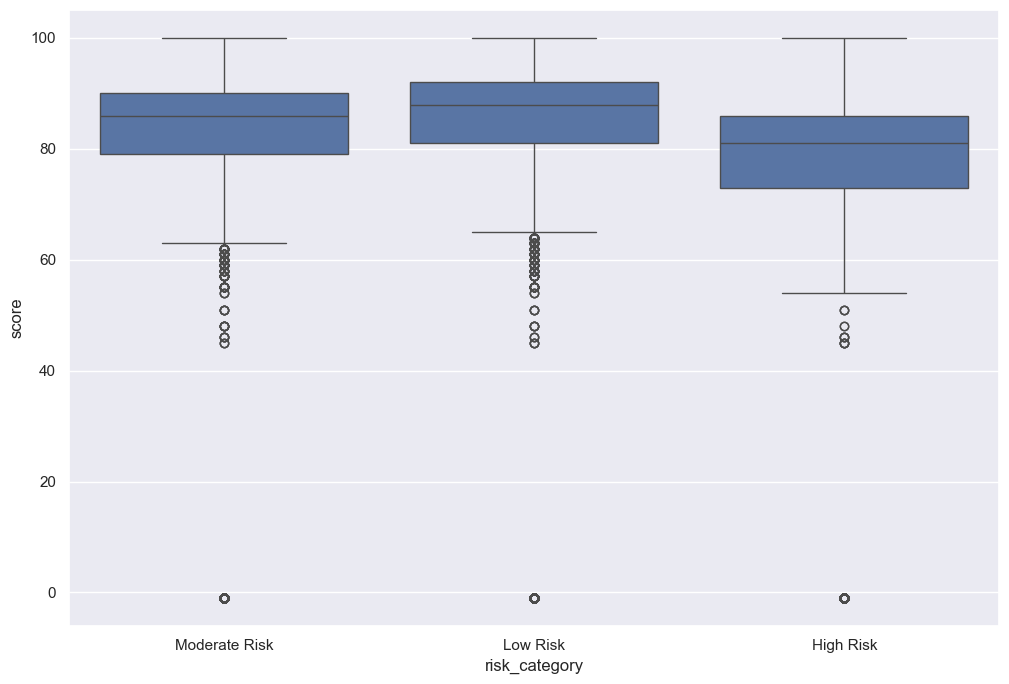

In [ ]:
# left join the inspections to violations df with the inspections dataframe and store it in score_dist_2017to2019
# each row will then reflect one inspection, but will also include details of each inspection the  index of each violation
score_dist_2017to2019 = df_i2v.merge(df_ins, how='left')

# inner join the core_dist_2017to2019 df with the violations dataframe and store it in score_dist_2017to2019
# each row will then reflect one inspection, but will also include the details of each inspection and the details of each violation
score_dist_2017to2019 = score_dist_2017to2019.merge(df_vio)

# use regex to filter to only the inspections in 2017-2019
score_dist_2017to2019 = score_dist_2017to2019[score_dist_2017to2019['date'].str.match(r'[0-1][0-9]/[0-3][0-9]/201[7-9]')]

# plot results
#use figure size of at least 12 by 8
plt.figure(figsize=(12,8))
# choose only the risk_category, score, and date columns for the box plots
bp_data = score_dist_2017to2019 #[['risk_category', 'score', 'date']]
# risk_category on the x axis
bp_x = score_dist_2017to2019['risk_category']
# score on the y axis
bp_y = score_dist_2017to2019['score']
# plot the boxplot
sns.boxplot(data = bp_data, x = bp_x, y = bp_y)



Looking at the boxplots it makes sense.  All categories have a min of 0 and max of 100.  The businesses with the low risk violations have the highest scores, those with the moderate risk violations have score distributed between low and high, and those with the high risk violations have the lowest scores.

# Part II - Making a Synthetic Dataset

In this part you're going to be create a synthetic dataset (dataframe) with 1000 observations (rows). You are going to use random number generators to create the data for you.

You can use either the numpy or scipy library, whichever you find easier. Be sure to import any libraries you use at the top of the ntoebook (not down here).

In [477]:
# number of random numbers to generate (instructions say 1000, n is initilized with 10,000 ?)
# intialize n with the sample size of 10,000
n = 10000
# create a new random number generator
rng = np.random.default_rng()
# generate the data
syndata = rng.random(n)
# take a peek at the data
syndata

array([0.56181204, 0.52232329, 0.55883158, ..., 0.71993611, 0.14891514,
       0.63608765], shape=(10000,))

In [ ]:
#Optional: set random seed for reproducibility (how you do it depends on whether yo uuse numpy or scipy to generate the random numbers)

# create a new random number generator "rng_seeded" seeded with the number 42 for reproducibility
rng_seeded = np.random.default_rng(seed=42)
# sample size 10000
n = 10000

# generate the data
syndata_seeded = rng_seeded.random(n)
# take a peek at the data

syndata_seeded


array([0.77395605, 0.43887844, 0.85859792, ..., 0.16534697, 0.3734104 ,
       0.48090777], shape=(10000,))

2.1) Create a variable "v1" of 10,000 numbers where y = 3x+4 is the value of the element at index x, i.e., [4, 7, 10, ...] (Done for you)

In [ ]:
v1 = 3 * np.arange(n) + 4
# take a peek at v1
v1

array([    4,     7,    10, ..., 29995, 29998, 30001], shape=(10000,))

2.2) Create a list of 10,000 samples from a normal (Gaussian) distribution with mean = 0 and variance = 10.

HINT: Pay attention to whether the argument to your number generator is variance or standard deviation. (It doesn't have to be a python list, it can be an array or dataframe, or whatever dtype is most convenient for you.)

In [ ]:
# noise = np.random.normal... (can also use scipy)
# of values to generate 
n = 10000
# desired mean
m = 0
# desired variance 
v = 10

# create a new random number generator
rng_normal = np.random.default_rng()
# generate noise given the parameters above
noise = rng_normal.normal(m, v, n)
# peek at the noise values
noise

array([-11.91266721,  -2.03146112,  -6.6810501 , ...,   2.38221621,
       -10.24722413,  -7.61345197], shape=(10000,))

2.3) Create a variable v2 = v1 + Gaussian noise, using the noise your created above

In [462]:
# v2 = v1 + noise
v2 = v1 + noise

2.4) Create a variable v3 = exp(v1) that exponentiates the libear variable in v1, also sometimes denoted e^(v1), e.g., v3[0] = e^4

In [ ]:
#v3 =
# calculate e^(v1) using np.exp() and store it in v3 
v3 = np.exp(v1)
# take a peek at v3
v3

C:\Users\robin\AppData\Local\Temp\ipykernel_32940\2071923852.py:2: RuntimeWarning: overflow encountered in exp
  v3 = np.exp(v1)


array([   54.59815003,  1096.63315843, 22026.46579481, ...,
                  inf,            inf,            inf], shape=(10000,))

2.5) Create a list v4 = exp(v1) + Gaussian noise, using the same noise variable you created earlier

In [ ]:
# add the noise to the e^(v1) values 
v4 = np.exp(v1) + noise
# take a peek at v4
v4

C:\Users\robin\AppData\Local\Temp\ipykernel_32940\2525642452.py:2: RuntimeWarning: overflow encountered in exp
  v4 = np.exp(v1) + noise


array([   42.68548282,  1094.60169731, 22019.7847447 , ...,
                  inf,            inf,            inf], shape=(10000,))

2.6) Create a list v5 = exp(v1 + Gaussian noise), using the same noise variable you created earlier

In [ ]:
# v5 = 
# calculate e^(v1+noise) and then store them in v5
v5 = np.exp(v1 + noise)
# take a peek at v5
v5

C:\Users\robin\AppData\Local\Temp\ipykernel_32940\2145815808.py:2: RuntimeWarning: overflow encountered in exp
  v5 = np.exp(v1 + noise)


array([3.66076872e-04, 1.43816600e+02, 2.76313196e+01, ...,
                  inf,            inf,            inf], shape=(10000,))

2.7) Create a dataframe with 10,000 rows and columns = [v1, v2, v3, v4, v5, noise]

In [ ]:
# df_full = ...
# create dictonary d with the corresponding column headers and their values
d = {'v1': v1, 'v2': v2, 'v3': v3, 'v4': v4, 'v5': v5, 'noise': noise}
# create df_full from the dictionary d
df_full = pd.DataFrame( data = d)
# take a peek at df_full
df_full

,v1,v2,v3,v4,v5,noise
0,4,-7.912667,5.459815e+01,4.268548e+01,3.660769e-04,-11.912667
1,7,4.968539,1.096633e+03,1.094602e+03,1.438166e+02,-2.031461
2,10,3.318950,2.202647e+04,2.201978e+04,2.763132e+01,-6.681050
3,13,16.166638,4.424134e+05,4.424166e+05,1.049740e+07,3.166638
4,16,12.227521,8.886111e+06,8.886107e+06,2.043360e+05,-3.772479
...,...,...,...,...,...,...
9995,29989,29978.354008,inf,inf,inf,-10.645992
9996,29992,29993.077235,inf,inf,inf,1.077235
9997,29995,29997.382216,inf,inf,inf,2.382216
9998,29998,29987.752776,inf,inf,inf,-10.247224


2.8) For each variable (v2, v3, v4, v5) create a separate scatter plot with v1 on the x-axis. Remark on your general observations.

In [468]:
###############################Consider whether to manually make mutiple plots or just use pairplot and remove this one
# Code for plots here, and remarks and observations here
# sns.scatterplot(data = df_full, x = 'v1',  y='v2')


f:\Code\CST577DataScience\Assignment2\venv\Lib\site-packages\matplotlib\ticker.py:2178: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


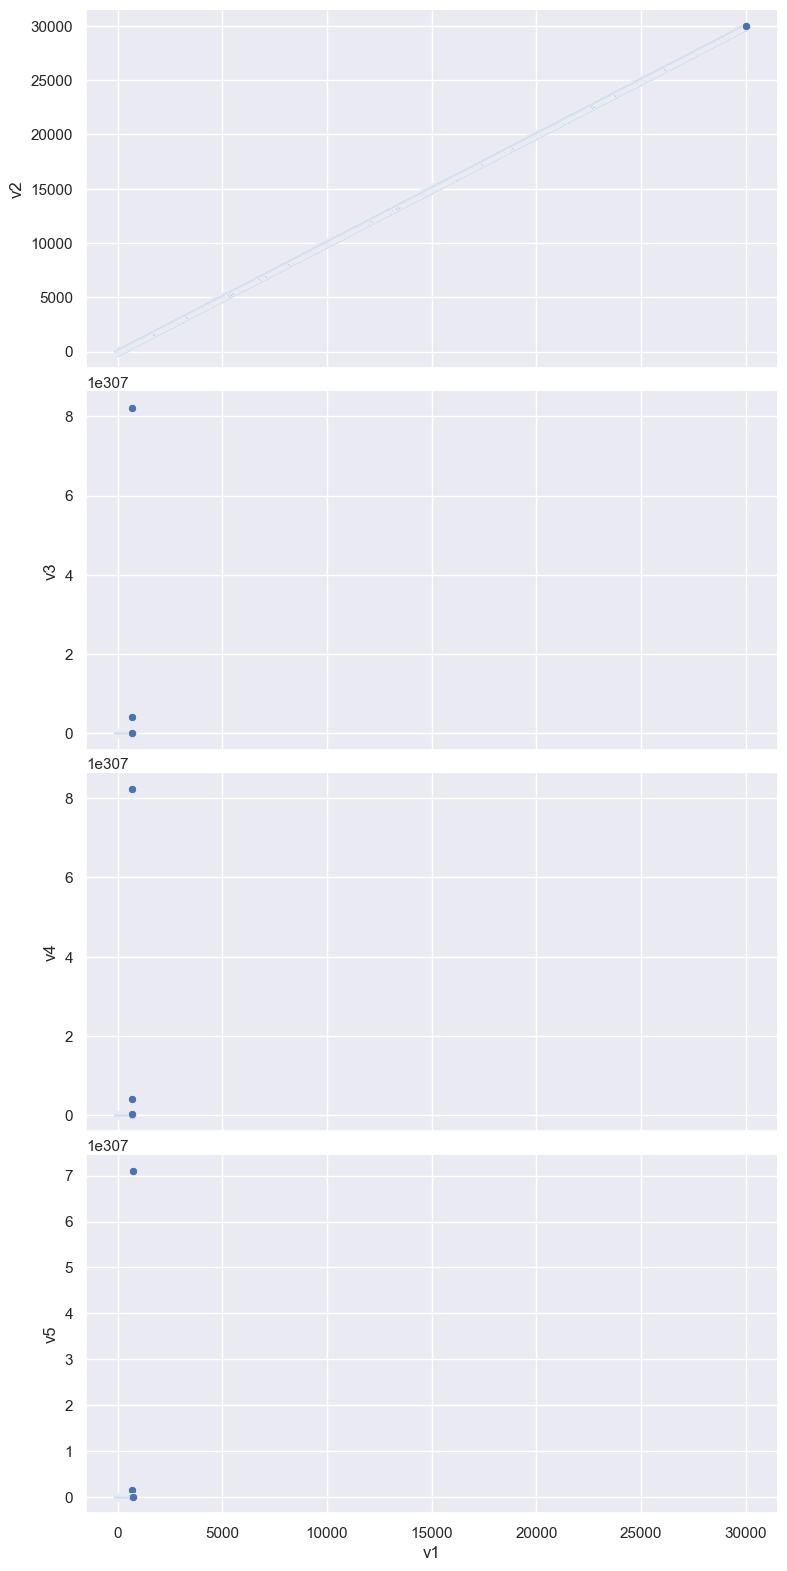

In [469]:
sns.pairplot(df_full, y_vars=['v2','v3', 'v4', 'v5'], x_vars='v1', height=4, aspect=2)

2.9)  Create pair of boxplots with v4 and v5 next to each other. Remark on how v4 and v5 compare, based on the violin plots and the scatter plots. You may use other plots or tools if helpful.

f:\Code\CST577DataScience\Assignment2\venv\Lib\site-packages\matplotlib\ticker.py:2178: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale
f:\Code\CST577DataScience\Assignment2\venv\Lib\site-packages\matplotlib\ticker.py:2178: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


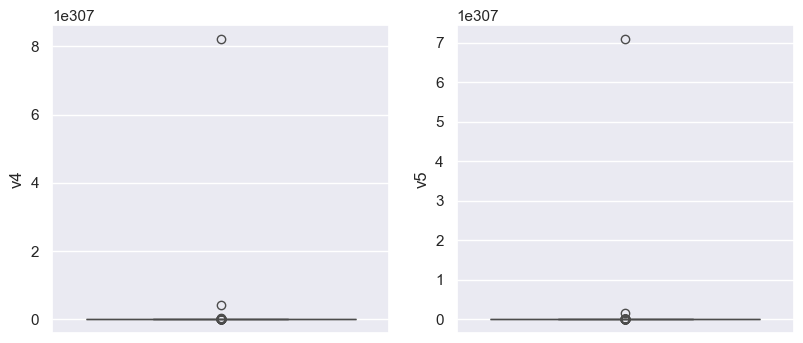

In [470]:
# sns.set(rc={"figure.figsize":(12, 8)}) #width=12, #height=8
# bp2_data = df_full
# bp2_x =df_full[['v4', 'v5']]
# bp2_y = df_full['v5']
# #score_dist_2017to2019[['risk_category', 'score', 'date']]



# v4_plot = sns.boxplot(y = df_full['v4'])
# v5_plot = sns.boxplot(y = df_full['v5'])
# plt.show(v4_plot)
# plt.show(v5_plot)

#violinplot I get an error that the matrix is not positive definite

plt.figure(figsize=(20,4))
plt.subplot(141)
sns.boxplot(y = df_full['v4'])
plt.subplot(142)
sns.boxplot(y = df_full['v5'])
plt.show()


f:\Code\CST577DataScience\Assignment2\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2913: RuntimeWarning: overflow encountered in dot
  c = dot(X, X_T.conj())
f:\Code\CST577DataScience\Assignment2\venv\Lib\site-packages\numpy\_core\function_base.py:162: RuntimeWarning: invalid value encountered in multiply
  y *= step
f:\Code\CST577DataScience\Assignment2\venv\Lib\site-packages\numpy\_core\function_base.py:172: RuntimeWarning: invalid value encountered in add
  y += start
f:\Code\CST577DataScience\Assignment2\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2913: RuntimeWarning: overflow encountered in dot
  c = dot(X, X_T.conj())


LinAlgError: Matrix is not positive definite

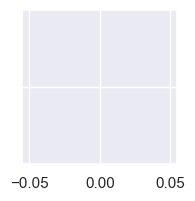

In [471]:
plt.figure(figsize=(2,2))
sns.violinplot(x = df_full['v4'])
sns.violinplot(x = df_full['v5'])

## Part III - Sampling and Convergence

3.1) Create a variable "pareto" that is a list of 10,000 samples from a Pareto distribution with shape parameter = 1.2 (usually denoted a or alpha). Add this list "pareto" as a column to your dataframe from Part II

In [ ]:
#pareto = np.random.pareto... (can also use scipy)
# store pareto shape parameter of 1.2 in variable a 
n = 10000
a = 1.2
# create a new random number generator for pareto distribution
rng_pareto = np.random.default_rng()
# generate n "random" numbers using pareto generator and parameters given
pareto = rng_pareto.pareto(a, n)
pareto
df_full['pareto'] = pareto
df_full

,v1,v2,v3,v4,v5,noise,pareto
0,4,-3.983711,5.459815e+01,4.661444e+01,1.861642e-02,-7.983711,3.530570
1,7,12.255261,1.096633e+03,1.101888e+03,2.100836e+05,5.255261,0.052139
2,10,8.331621,2.202647e+04,2.202480e+04,4.153144e+03,-1.668379,0.198059
3,13,7.069145,4.424134e+05,4.424075e+05,1.175143e+03,-5.930855,0.347365
4,16,29.674236,8.886111e+06,8.886124e+06,7.715375e+12,13.674236,0.567922
...,...,...,...,...,...,...,...
9995,29989,30015.871139,inf,inf,inf,26.871139,1.597870
9996,29992,29995.639811,inf,inf,inf,3.639811,0.789294
9997,29995,30002.761455,inf,inf,inf,7.761455,0.069789
9998,29998,30012.853776,inf,inf,inf,14.853776,0.252792


3.2) Add two more columns to your dataframe labeled "running_avg_normal" and "running_avg_pareto". In the "running_avg_normal" column put the running average of the (unsorted) values in the noise column. For example, if the values in the noise column are [0.1, 0.3, 0.5, ...] then the running average should be [0.1, 0.2, 0.3, ...]. Do the same for the Pareto column.

HINT: Check out the .expanding() and .mean() methods for pandas Series objects

In [ ]:
# calculate running average of noise column and add it as "running_avg_normal" column
df_full['running_avg_normal'] = df_full['noise'].expanding().mean()
# calculate running average of pareto column and add it as "running_avg_pareto" column
df_full['running_avg_pareto']= df_full['pareto'].expanding().mean()
df_full

,v1,v2,v3,v4,v5,noise,pareto,running_avg_normal,running_avg_pareto
0,4,-3.983711,5.459815e+01,4.661444e+01,1.861642e-02,-7.983711,3.530570,-7.983711,3.530570
1,7,12.255261,1.096633e+03,1.101888e+03,2.100836e+05,5.255261,0.052139,-1.364225,1.791355
2,10,8.331621,2.202647e+04,2.202480e+04,4.153144e+03,-1.668379,0.198059,-1.465610,1.260256
3,13,7.069145,4.424134e+05,4.424075e+05,1.175143e+03,-5.930855,0.347365,-2.581921,1.032033
4,16,29.674236,8.886111e+06,8.886124e+06,7.715375e+12,13.674236,0.567922,0.669310,0.939211
...,...,...,...,...,...,...,...,...,...
9995,29989,30015.871139,inf,inf,inf,26.871139,1.597870,-0.026780,4.174782
9996,29992,29995.639811,inf,inf,inf,3.639811,0.789294,-0.026414,4.174444
9997,29995,30002.761455,inf,inf,inf,7.761455,0.069789,-0.025635,4.174033
9998,29998,30012.853776,inf,inf,inf,14.853776,0.252792,-0.024147,4.173641


3.3) Create a lineplot for running_avg_normal and a lineplot for running_avg_Pareto. Remark on your observations.

<Axes: >

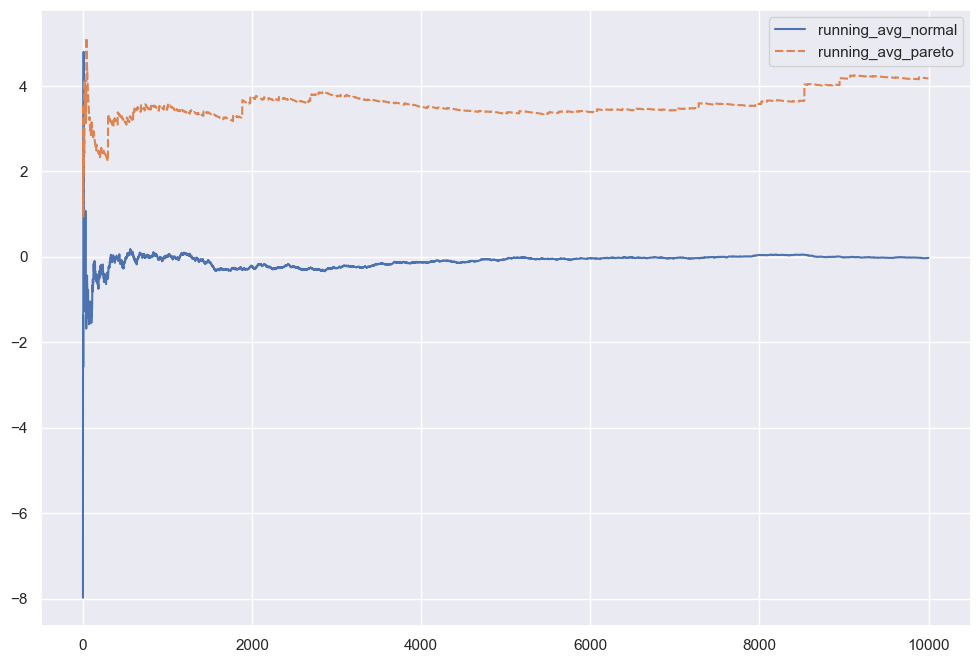

In [ ]:
d = df_full[['running_avg_normal', 'running_avg_pareto']]
sns.lineplot(data = d)